Make subplots of cross sections at various cross sections in ASE. 
Works for latitude profiles (with lon on x axis) or lon profiles (with lat on x axis). 
Option to plot T as contours.

Retrieves the 5th year of data from the warmest runs and coolest runs as defined in Datasets.py.
Plots the mean during the 5th year for the warms, the cools, and the difference between the two. 

In [14]:
import numpy as np
from matplotlib import pyplot as plt
import Functions_load_output as flo
import Functions_data_analysis as fda
import Functions_plotting as fp
from Datasets import exp_set_dict, warm_forc_mech1, warm_forc_mech2, cool_forc

In [27]:
# Use importlib to reload modules after editing them
import importlib
importlib.reload(fp)

<module 'Functions_plotting' from '/glade/campaign/univ/ulnl0002/Gemma/Analysis/Functions_plotting.py'>

In [43]:
# Select warm and cool runs
warm_forc = warm_forc_mech1
if warm_forc == warm_forc_mech1:
    warm_forc_str = '1982_1984_1992_1989'
else:
    warm_forc_str = '2015'
print('Using these runs as warm composite:',warm_forc)
warm_ic = '1995'
cool_forc = cool_forc
cool_ic = '1995'

# Select regions-------------

# Lat cross sections (lon on x axis):
regions = list(fda.lat_cross_dict.keys())
# regions = ['SB1','SB2']

# Lon cross sections (lat on x axis):
# regions = list(fda.lon_cross_dict.keys())[0:-1] #THERE ARE TOO MANY OF THESE. REMOVE SOME!
print(regions)
# regions = ['COT_3','EOT_2']

# Select vars to plot-------------
prefix = 'state_3d_set2' 
vname = 'V'
contour_T = True #whether to plot T contours on top of contourf plot for above vname

# Select time period over which to average--------------
# Ex: idx 47 and 12 months averages over the 5th year
month_start_idx = 47
n_months = 12

Using these runs as warm composite: ['1982', '1984', '1992', '1989']
['lat_1', 'lat_2', 'lat_3', 'lat_4', 'lat_5']


In [44]:
# These auto populate based on above params
warm_runs = ['run_forc_erai_'+str(yr)+'_rep_ic_'+warm_ic for yr in warm_forc]
cool_runs = ['run_forc_erai_'+str(yr)+'_rep_ic_'+cool_ic for yr in cool_forc]

cmap_dict = {'U':'BrBG_r','V':'PiYG_r','T':'RdBu_r','S':'GnBu'}
cmap = cmap_dict[vname]
lev_dict = {'U':np.linspace(-0.1,0.1,11),'V':np.linspace(-0.1,0.1,11),\
           'T':np.linspace(-2.4,2.4,13),'S':np.linspace(34,34.8,17)}

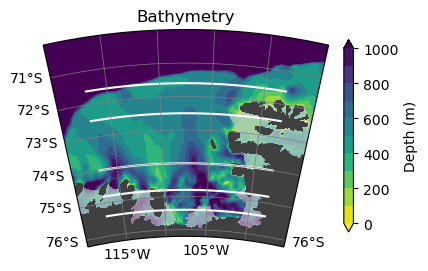

In [45]:
# Show locations of cross sections on bathymetry map
fp.plot_bathymetry_and_locs('AS_near', regions)
# plt.savefig('Plots/Maps/Bathymetry_map_lat_cross_sections.png',dpi=400)

In [38]:
# Load data (each item in list will have length n_regions, containining xr data arrays with shape (n_depth, n_lats)

warm_list, cool_list, diff_list = fda.load_composite_data(vname, regions, warm_runs, cool_runs, \
                                                      prefix, month_start_idx, n_months)



lat_1
Getting V data for all runs...
0
saving date from these times for 1st run:
 [cftime.DatetimeNoLeap(1999, 1, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 2, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 3, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 4, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 5, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 7, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 8, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 9, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 10, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 11, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 12, 1, 0, 0, 0, 0, has_year_zero=True)]
1
2
3
Saving as xr data array...
Getting V data for all runs...
0
saving date from these times for 1st run:
 [

In [39]:

if contour_T:
    
    # Get T to plot as contours
    warm_list_T, cool_list_T, diff_list_T = fda.load_composite_data('T', regions, warm_runs, cool_runs, \
                                                      prefix, month_start_idx, n_months)

lat_1
Getting T data for all runs...
0
saving date from these times for 1st run:
 [cftime.DatetimeNoLeap(1999, 1, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 2, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 3, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 4, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 5, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 7, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 8, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 9, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 10, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 11, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 12, 1, 0, 0, 0, 0, has_year_zero=True)]
1
2
3
Saving as xr data array...
Getting T data for all runs...
0
saving date from these times for 1st run:
 [

saving as Plots/Depth Profiles/Figure_U_5thyr_mean_lon_slices_1982, 1984, 1992, 1989.png


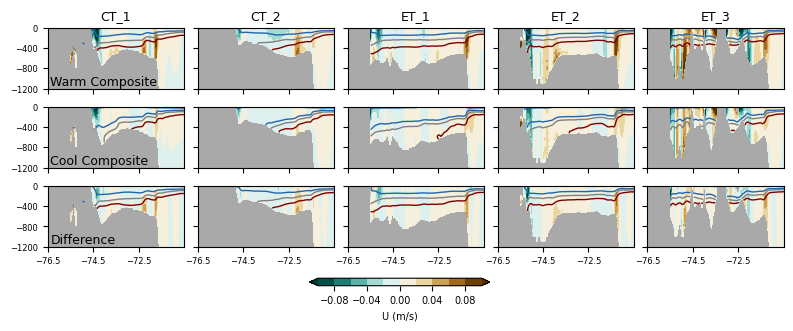

In [48]:
importlib.reload(fp)
# for lon cross section, plot with warm, cool, and difference as the 3 rows

if regions[0] in fda.lon_cross_dict.keys():
    
    plot_data = warm_list + cool_list + diff_list
    
    col_titles = regions
    row_titles = ['Warm Composite','Cool Composite','Difference']
    
    if contour_T:
        #NOTE WARM TEMPS ARE PLOTTED ON DIFFERENCE bc you want to know whether warm CDW water is moving
        T_data = warm_list_T + cool_list_T + warm_list_T
    else:
        T_data = None

    # Edit fig name for saving
    fig_name = 'Plots/Depth Profiles/Figure_'+vname+'_5thyr_mean_lon_slices_'+warm_forc_str+'.png'
    # fig_name = None
    fp.make_side_profile_figs(plot_data, vname, \
                              T_data = T_data,
                              col_titles=col_titles, row_titles = row_titles, \
                              levs=lev_dict[vname],\
                              cmap=cmap, ylims=[-1200,0],xlims=[-76.5,-70.5],\
                              fig_name = fig_name)


saving as Plots/Depth Profiles/Figure_V_5thyr_mean_lat_slices_1982_1984_1992_1989.png


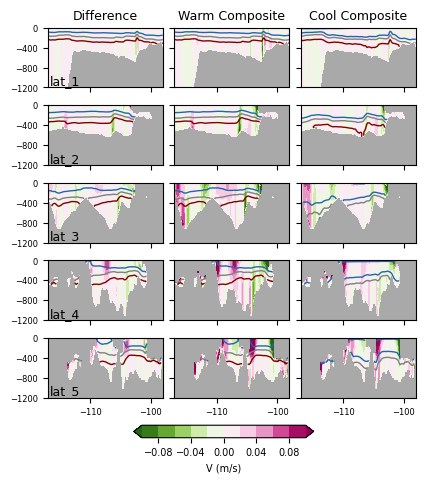

In [46]:
# Plot lat_cross sections with differences, warm, cool as columns and locs as rows
importlib.reload(fp)

if regions[0] in fda.lat_cross_dict.keys():
    
    # Want 1 long list of diff, warm, cool for each location
    plot_data = []
    for i in range(len(regions)):
        plot_data.append(diff_list[i])
        plot_data.append(warm_list[i])
        plot_data.append(cool_list[i])

    col_titles = ['Difference','Warm Composite','Cool Composite']
    row_titles = regions
    
    if contour_T:
        #NOTE WARM TEMPS ARE PLOTTED ON DIFFERENCE bc you want to know whether warm CDW water is moving
        T_data = []
        for i in range(len(regions)):
            T_data.append(warm_list_T[i])
            T_data.append(warm_list_T[i])
            T_data.append(cool_list_T[i])
    else:
        T_data = None

    # Edit fig name for saving
    fig_name = 'Plots/Depth Profiles/Figure_'+vname+'_5thyr_mean_lat_slices_'+warm_forc_str+'.png'
    # fig_name = None
    fp.make_side_profile_figs(plot_data, vname, \
                              T_data = T_data,\
                              col_titles=col_titles, row_titles = row_titles, \
                              levs=lev_dict[vname],\
                              cmap=cmap, ylims=[-1200,0],
                              fig_name = fig_name)
    